In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Future prediction 
#To load the file
df = pd.read_csv("Electric_Production.csv")  #dummy dataset
df.head() 

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
#How many rows and columns in given dataset
df.shape

(397, 2)

In [4]:
#To check the last 5 record
df.tail()

,DATE,IPG2211A2N
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [5]:
#To check the null values in given dataset
df.isnull().sum()

DATE          0
IPG2211A2N    0
dtype: int64

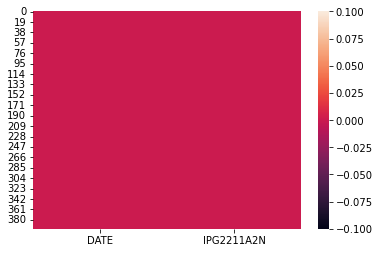

In [6]:
#Visualisation to null values
sb.heatmap(df.isnull())
plt.show()

In [7]:
#To check the datatypes
df.dtypes

DATE           object
IPG2211A2N    float64
dtype: object

In [9]:
#To change the datatype of date column from object type to datetime type
df["DATE"] = pd.to_datetime(df['DATE'])

#Now to check the changes in datatypes
df.dtypes

DATE          datetime64[ns]
IPG2211A2N           float64
dtype: object

In [10]:
df.head()  # format of date : yyyy-mm-dd

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


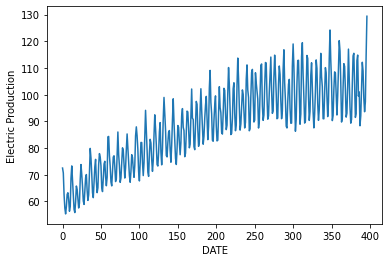

In [13]:
#Plot given time series data
plt.plot(df["IPG2211A2N"])   #take index number as input
plt.xlabel("DATE")     
plt.ylabel("Electric Production")
plt.show()

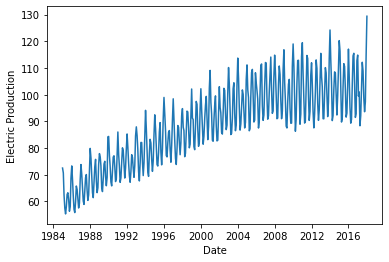

In [14]:
#Plot given time series data
plt.plot(df["DATE"],df["IPG2211A2N"])
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.show()

In [ ]:
# Given Time Series :
# 1. Non-Stationary TS
# 2. Trend occur (Upward growth)
# 3. Seasonality occurs

#to see thar , it has trend as well as it has seasonality
'''Now it has trend that means it does not have a constant mean and it has 
seasonality so there are 2 factors which has    this data is non-stationary.
so if this data is non-stationary we need to do something about it and what will
need to do we need to perform differencing '''

In [15]:
#Given Time Series data is non-stationary so we need to perform Differencing
#Apply First differencing : use shift(1)
df_diff_1 = df['IPG2211A2N']-df['IPG2211A2N'].shift(1) #first order differencing
df_diff_1.head(10)

0       NaN
1   -1.8332
2   -8.2218
3   -4.9788
4   -2.1563
5    2.7753
6    4.5298
7    0.6283
8   -2.6639
9   -4.2692
Name: IPG2211A2N, dtype: float64

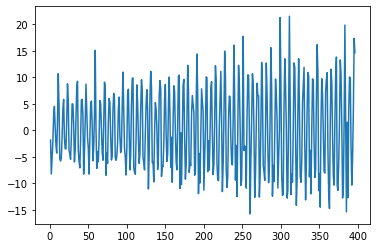

In [16]:
#Plot new Time Series after first order differencing , but first remove null value
plt.plot(df_diff_1.dropna())    #temprary remove the null value
plt.show()

In [ ]:
#in this above plot ,the trend component removed 
#but stil seasonality means stil the TS data is non-stationary .
#we are removing seasonality component , then we need perform diffrencing
#basis of seasonality . here we have dataset , season=12 month means 
#1 season=12 month 
#perform Seasonal difference means subtract original time series data from
#lag12 means shift(12)

In [17]:
df_seasonal_diff=df['IPG2211A2N']-df['IPG2211A2N'].shift(12)

In [18]:
df_seasonal_diff.head(20)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12    0.8005
13   -2.6851
14   -0.2281
15   -0.4385
16    0.4986
17    1.8101
18    3.1453
19    1.2331
Name: IPG2211A2N, dtype: float64

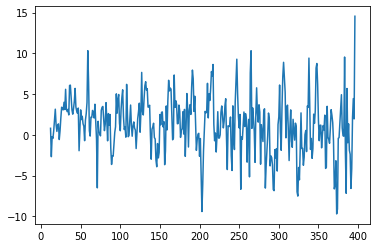

In [19]:
#plot new time series apply lag 12
plt.plot(df_seasonal_diff.dropna())
plt.show()

In [ ]:
#in above plot , the seasonality component removed . There are some up & downs 
#these are not seasonality , but these are just random error or white noise .
#here Seasonality has been removed but not satisfied still show some trend
#apply first order differencing  , means subtract df_seasonal_diff from
#lag1 of itself Time series seasonal_difference

In [20]:
df_1=df_seasonal_diff-df_seasonal_diff.shift(1)  #first order differencing
#apply on new ts df_seasonal_diff : after apply 12th differencing

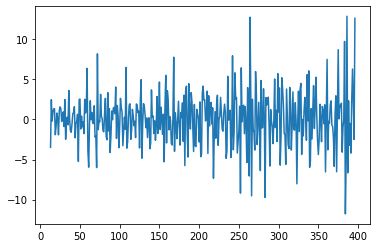

In [21]:
#plot again new series df_1
plt.plot(df_1.dropna())
plt.show()

In [ ]:
#Now its look much better and much stable we can see there is a constant
#mean means here mean=0 . Here the trend has been removed and seasonality 
#has been removed .
#There are some white noise means random error show. 
#but this look much better.
#This is the concept of differencing which is the middle of ARIMA that is
#Integration

In [ ]:
#ARIMA model use in the time series data
#AR(p) I(d) MA(q)
#find the value of p with the help of PACF
#find the value of q with the help of ACF
#an d=1 because apply only frst order differencing

In [ ]:
#Identification of AR(p) and MA(q)
#pth order and qth order

In [22]:
#plot pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [23]:
#draw pacf plot on sttionary time series df_1
df_1=df_1.dropna()

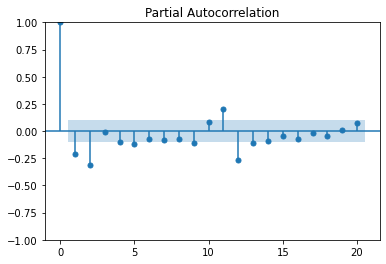

In [24]:
plot_pacf(df_1,lags=20)
plt.show()
#light blue colour rectangle means significant area


In [ ]:
#here see PACF plot, order of p=2 means AR(p=2)

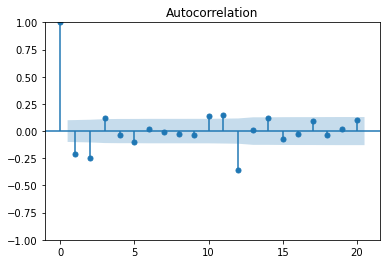

In [25]:
#now we identity the order of MA(q) : decided on ACF means auto
#correlation function
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_1,lags=20)
plt.show()

In [ ]:
#q=3

In [ ]:
#ARIMA (p=2,d=1,q=1)
#generalised equation : 

In [26]:
#SARIMAX or seasonality ARIMAX
#it is special version of ARIMA
#call inbuilt class SARIMAX

import statsmodels.api as sm
#sm is a user defined alias name
#api: application programming interface

In [27]:
#create object of class SARIMAX and passing the arguments
model=sm.tsa.statespace.SARIMAX(df['IPG2211A2N'],order=(2,1,3),seasonal_order=(2,1,3,12),trend='t')
#order=(p,d,q), seasonal_order=(p,d,q,seasonality)

#trend can be either linear or exponential
#if trend is linear then pass 't' in trend parameter otherwise pass 'c' in 
#trend parameter

In [28]:
#train the model, using fit() method of SARIMAX
model=model.fit()

In [41]:
df.shape

(397, 2)

In [42]:
#test the model, using predict method of SARIMAX class
y_pred=model.predict(start=278,end=396)

In [43]:
y_pred

278    101.321021
279     91.381767
280     92.639444
281    101.059807
282    111.528556
          ...    
392     98.811513
393     90.450765
394     96.917697
395    110.215706
396    120.488753
Name: predicted_mean, Length: 119, dtype: float64

In [44]:
#to add new column forecast in existing dataframe df
df['forecast']=y_pred
df.tail(10)

,DATE,IPG2211A2N,forecast
387,2017-04-01,88.3530,92.042137
388,2017-05-01,92.0805,88.971580
389,2017-06-01,102.1532,102.980148
390,2017-07-01,112.1538,110.884325
391,2017-08-01,108.9312,111.053282
392,2017-09-01,98.6154,98.811513
393,2017-10-01,93.6137,90.450765
394,2017-11-01,97.3359,96.917697
395,2017-12-01,114.7212,110.215706
396,2018-01-01,129.4048,120.488753


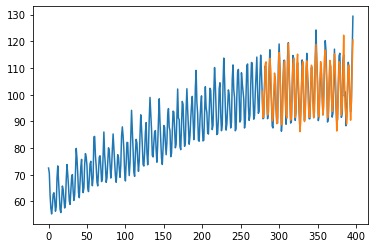

In [45]:
#plot : actual output and forecast
plt.plot(df[['IPG2211A2N','forecast']])
plt.show()

In [48]:
y_test=df['IPG2211A2N']
y_test=y_test[278:397,]   #start=143, stop=204-1=203
y_test

278    100.4386
279     90.9944
280     91.2348
281    103.9581
282    110.7631
         ...   
392     98.6154
393     93.6137
394     97.3359
395    114.7212
396    129.4048
Name: IPG2211A2N, Length: 119, dtype: float64

In [51]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred))
print("R2 Score: ",r2_score(y_test,y_pred))

Mean Squared Error:  8.748135860175873
R2 Score:  0.9066212475310133
